In [1]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [2]:
import pandas as pd

In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
path = 'datasets/Canada.xlsx'
df = pd.read_excel(path,
                   engine = 'openpyxl', 
                   sheet_name = 'Canada by Citizenship', 
                   skiprows = range(20),
                   skipfooter = 2
                  )
df.tail(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [6]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
df.head(1)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


In [8]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName'], axis = 1, 
        inplace = True)

In [9]:
df.head(1)

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004


# Description of my dataset

This is a dataset, explains the inmigrants to Canada from various countries from 1980 to 2013.

# My variables of interests

* `OdName:` the name of the country,
* `AreaName:` Continents,
* `RegName:` 1980 - 1981

1. How many people reached Canada from Japan during 1980 to 2013?

In [10]:
df.rename(columns = {'OdName': 'Country',
          'AreaName':'Continent',
          'RegName' : 'Region'},
          inplace = True,
         )
df.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df['Total'] = df.iloc[:,3:].sum(axis = 1)
#df.iloc[:, 3]

In [12]:
df.head(2)

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [13]:
df.set_index('Country', inplace = True)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699


In [14]:
df.loc['Japan', 'Total']

27707

# Clase 3: Pivoto Tables

In [15]:
import pandas as pd
import numpy as np

In [16]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [17]:
df = pd.read_csv('datasets/census.csv')
df.head(2)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333


In [18]:
x = df.columns.tolist()
x.sort
x

['SUMLEV',
 'REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'STNAME',
 'CTYNAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'NPOPCHG_2015',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NATURALINC2014',
 'NATURALINC2015',
 'INTERNATIONALMIG2010',
 'INTERNATIONALMIG2011',
 'INTERNATIONALMIG2012',
 'INTERNATIONALMIG2013',
 'INTERNATIONALMIG2014',
 'INTERNATIONALMIG2015',
 'DOMESTICMIG2010',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'DOMESTICMIG2015',
 'NETMIG2010',
 'NETMIG2011',
 'NETMIG2012',
 'NETMIG2013',
 'NETMIG2014',
 'NETMIG2015',
 'RES

In [19]:
myPivot = pd.pivot_table(df,
                         index = ['STNAME', 'CTYNAME'],
                         values = ['BIRTHS2010'],
                         aggfunc = ['count'],
                         columns = 'REGION',
                         margins = True
                        )
myPivot

count                             
                        BIRTHS2010                             
REGION                           1       2       3      4   All
STNAME  CTYNAME                                                
Alabama Alabama                NaN     NaN     1.0    NaN     1
        Autauga County         NaN     NaN     1.0    NaN     1
        Baldwin County         NaN     NaN     1.0    NaN     1
        Barbour County         NaN     NaN     1.0    NaN     1
        Bibb County            NaN     NaN     1.0    NaN     1
...                            ...     ...     ...    ...   ...
Wyoming Uinta County           NaN     NaN     NaN    1.0     1
        Washakie County        NaN     NaN     NaN    1.0     1
        Weston County          NaN     NaN     NaN    1.0     1
        Wyoming                NaN     NaN     NaN    1.0     1
All                          226.0  1067.0  1439.0  461.0  3193

[3193 rows x 5 columns]

In [20]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [21]:
df = pd.read_csv('datasets/airline_data.csv', low_memory = False)
df.head(2)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [23]:
# Clase 4: 

In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

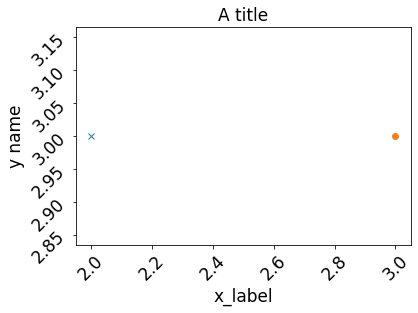

In [26]:
a= plt.plot(2,3,'x')
plt.plot(3, 3, 'o')

plt.xticks(rotation=45, fontsize=17)
plt.yticks(rotation=45, fontsize=17)

plt.xlabel('x_label', fontsize=17)
plt.ylabel('y name', fontsize=17)

plt.title('A title', fontsize=17)
plt.show()

# 1. Line graph of weight and height

In [27]:
data={'Names':['Name 1', 'Name 2', 'Name 3', 'Name 4', 'Name 5', 'Name 6'],
      'Age': [25,30,30,25,25,35],
      'Weight': [60,62,65,63,68,70]
     }

df=pd.DataFrame(data)
df

,Names,Age,Weight
0,Name 1,25,60
1,Name 2,30,62
2,Name 3,30,65
3,Name 4,25,63
4,Name 5,25,68
5,Name 6,35,70


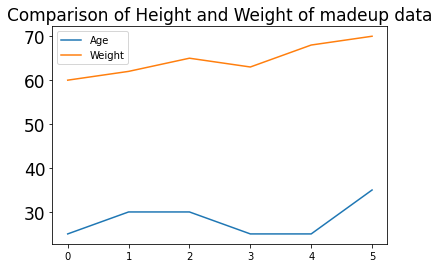

In [28]:
df.plot(kind='line')
plt.yticks(fontsize=17)
plt.title('Comparison of Height and Weight of madeup data', fontsize=17)
plt.show()

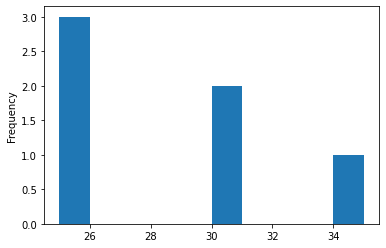

In [29]:
df['Age'].plot(kind='hist')
plt.show()

# 2. Represent Male and female data of CWDistance in scatter plot

In [30]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import seaborn as sns

In [32]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [33]:
df = pd.read_csv('datasets/Cartwheeldata.csv')
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


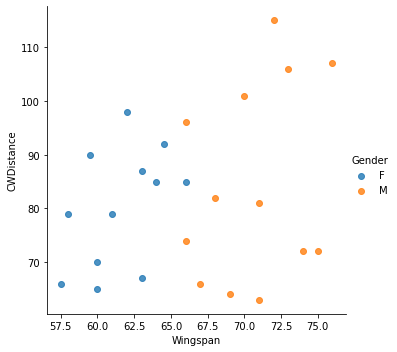

In [34]:
sns.lmplot(x = 'Wingspan',
           y = 'CWDistance',
           data = df,
           fit_reg = False,
           hue = 'Gender',
          )
plt.show()

# 2. Make a distribution of a categorical variable 'Gender' using a swarmplot.

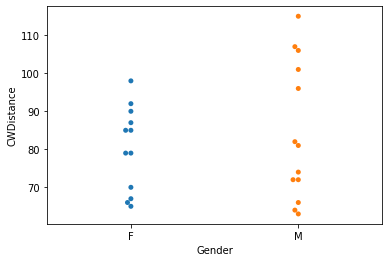

In [35]:
sns.swarmplot(x = 'Gender',
              y = 'CWDistance',
              data = df)
plt.show()

#### What is the minimum, maximum, median , and quartiles of the variables, Height, Wingspan, CWDistance, CompleteGroup, Score using a box plot

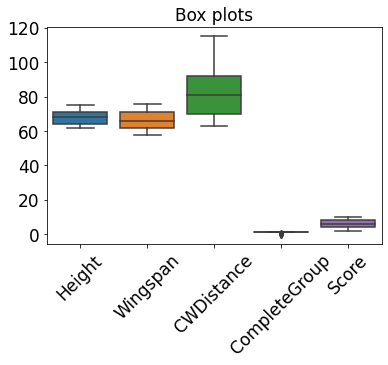

In [36]:
sns.boxplot(data = df.loc[:,
                          ['Height', 'Wingspan', 'CWDistance', 'CompleteGroup', 'Score'] 
                         ]
           )
plt.xticks(fontsize = 17, rotation = 45)
plt.yticks(fontsize = 17)
plt.title('Box plots', fontsize = 17)
plt.show()

#### Make a comparison b/w Male and Female Score using boxplot side by side

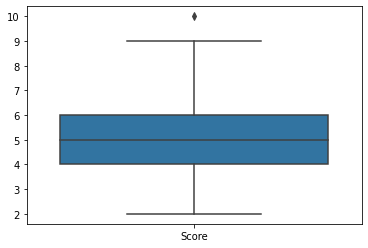

In [37]:
sns.boxplot(data = df.loc[df['Gender']=='M',['Score']]
           )

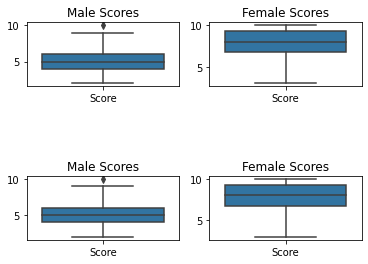

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(3,2,1) # number of rows, columns, positionID.
sns.boxplot(data = df.loc[df['Gender']=='M',['Score']]
           )

ax2 = fig.add_subplot(3,2,2) # number of rows, columns, positionID.
sns.boxplot(data = df.loc[df['Gender']=='F',['Score']]
           )
ax1.title.set_text('Male Scores')
ax2.title.set_text('Female Scores')

ax3 = fig.add_subplot(3,2,5) # number of rows, columns, positionID.
sns.boxplot(data = df.loc[df['Gender']=='M',['Score']]
           )

ax4 = fig.add_subplot(3,2,6) # number of rows, columns, positionID.
sns.boxplot(data = df.loc[df['Gender']=='F',['Score']]
           )

ax3.title.set_text('Male Scores')
ax4.title.set_text('Female Scores')

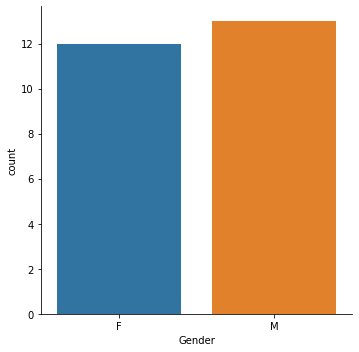

In [39]:
sns.displot(df.CWDistance)
sns.countplot(x = 'Gender', data = df)

# Clase 5: 

In [40]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [41]:
pip install xLrd

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install openpyxL

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_excel('datasets/Canada.xlsx',
                   sheet_name = 'Canada by Citizenship',
                   engine = 'openpyxl',
                   skiprows = range(20),
                   skipfooter = 2
                  )
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [45]:
# Description of dataset

This dataset explains, 

In [46]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [47]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName'],
        axis = 1, 
        inplace = True)
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [48]:
df.rename(columns = {'OdName': 'Country', 
                     'AreaName': 'Continent', 
                     'RegName': 'Region',},
          inplace = True
         )

In [49]:
df.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [50]:
df.columns = list(map(str,df.columns))
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

## Description of variables
Country - Is a variable, column, representes the origin of people. Type of the variable is Str
Continent - ...
Region - ...
1980 - 2013 - is columns represets the number inmigrants from different countries to Canada

#### 1. What is distribution of immigration from Japan to Canada during 1980 to 2013?

In [51]:
df.set_index('Country', inplace = True)

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


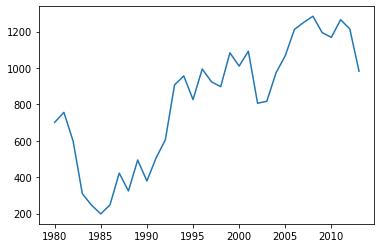

In [54]:
df.loc['Japan' , '1980':].plot()
plt.show()

In [55]:
mpl.style.use('bmh')

In [56]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Conclusion

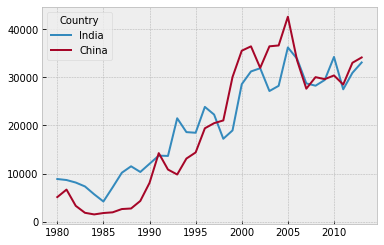

In [61]:
ci = df.loc[['India' , 'China'], '1980':].transpose()
ci.plot()
plt.show()